# WeatherPy

## Analysis
1. The scatter plot between latitude and maximum temperature indicates that there is a correlation between these two factors
2. With r-value = -0.85, there is a strong, negative relationship between latitude and max temperature for cities in the Northern Hemisphere. With r-value = 0.69, there is a positive relationship between latitude and max temperature for cities in the Southern Hemisphere. Both indicate that a city closer to the equator (latitude = 0), the max temperature increases
3. There is no correlation between latitude and cloudiness, windspeed or humidity; all r-values are close to 0

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import linregress

# Import API key (Remember to change API keys in api_keys.py)
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# Import time to account for API call limit
import time

## Generate Cities List

In [2]:
# Creating empty lists for cities, contries and their latitudes and longitudes
lat_lng_ls = []
cities_ls = []
countries_ls = []

# Using np.random to generate random latitude and longitude pairs along the full range
latitude = np.random.uniform(low = -90.0000, high = 90.0000, size = 1400)
longitude = np.random.uniform(low = -180.0000, high = 180.0000, size = 1400)

# Populating lat_lng list with generated latitudes and longitudes
lat_lng_ls = zip(latitude, longitude)

# Using citypy to look for nearest city with latitude and longitude
for lat_lng in lat_lng_ls:
    city_name = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country_name = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # for cities not already in cities, append cities_ls and countries_ls
    if city_name not in cities_ls:
        cities_ls.append(city_name)
        countries_ls.append(country_name.upper())

print(f'{len(cities_ls)} unique cities have been selected.')

554 unique cities have been selected.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Building partial URL query
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Set up lists to hold response information
city_name = []
country = []
lat = []
lng = []
date = []
cloudiness = []
humidity = []
max_temp = []
wind_speed = []

# Set initial count for Record and Set number
record_count = 0
set_count = 1

# Begin data retrieval
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through each city in cities_ls
for city in cities_ls:
    
    response = requests.get(query_url + city).json()
    record_count = record_count + 1
    # Try to find city in API, if it is found, append information to lists
    try:
        # Log print of processing
        print(f"Processing Record {record_count} of Set {set_count} | {response['name']}")
        
        # Append lists with information requested
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        # Keep track of record count
#         record_count = record_count + 1
    
    # If city is not found, print not found
    except:
        print("City not found. Skipping...")
        
    # Handling API call limits
    if record_count == 55:
        print("Please wait 10 seconds to allow for API call limit")
        set_count = set_count + 1
        record_count = 0
        time.sleep(10)

print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Bengkulu
Processing Record 2 of Set 1 | Kavieng
Processing Record 3 of Set 1 | Loandjili
Processing Record 4 of Set 1 | Qaanaaq
Processing Record 5 of Set 1 | Barra de Tecoanapa
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Luancheng
City not found. Skipping...
Processing Record 9 of Set 1 | Kapaa
Processing Record 10 of Set 1 | Looc
Processing Record 11 of Set 1 | Ust-Kuyga
Processing Record 12 of Set 1 | Rikitea
Processing Record 13 of Set 1 | Punta Arenas
Processing Record 14 of Set 1 | Qujing
Processing Record 15 of Set 1 | Tiznit Province
Processing Record 16 of Set 1 | Poso
Processing Record 17 of Set 1 | Hithadhoo
Processing Record 18 of Set 1 | Atuona
Processing Record 19 of Set 1 | Barrow
Processing Record 20 of Set 1 | Ilulissat
Processing Record 21 of Set 1 | Geraldton
Processing Record 22 of Set 1 | Port Alfred
Processing Record 23 of Set 1 | Dongying
Processing R

Processing Record 36 of Set 4 | Hobyo
Processing Record 37 of Set 4 | Taoudenni
Processing Record 38 of Set 4 | Machalí
City not found. Skipping...
Processing Record 40 of Set 4 | Bambous Virieux
Processing Record 41 of Set 4 | Khor
Processing Record 42 of Set 4 | Narsaq
Processing Record 43 of Set 4 | Agadez
Processing Record 44 of Set 4 | Hambantota
Processing Record 45 of Set 4 | Mudanjiang
Processing Record 46 of Set 4 | Erzin
Processing Record 47 of Set 4 | Goundam
Processing Record 48 of Set 4 | Iqaluit
Processing Record 49 of Set 4 | Adana Province
Processing Record 50 of Set 4 | Honggang
Processing Record 51 of Set 4 | Petropavlovsk-Kamchatskiy
Processing Record 52 of Set 4 | Stephenville
Processing Record 53 of Set 4 | Koslan
Processing Record 54 of Set 4 | Clyde River
City not found. Skipping...
Please wait 10 seconds to allow for API call limit
Processing Record 1 of Set 5 | Humaitá
Processing Record 2 of Set 5 | Dāmghān
Processing Record 3 of Set 5 | Severo-Kuril'sk
Process

Processing Record 17 of Set 8 | Pemangkat
Processing Record 18 of Set 8 | Raja
Processing Record 19 of Set 8 | Sioux Lookout
Processing Record 20 of Set 8 | Asău
Processing Record 21 of Set 8 | Tuxtla Gutiérrez
Processing Record 22 of Set 8 | Praia
Processing Record 23 of Set 8 | Chimbote
City not found. Skipping...
Processing Record 25 of Set 8 | San Cristobal
Processing Record 26 of Set 8 | Kiama
Processing Record 27 of Set 8 | Balkanabat
Processing Record 28 of Set 8 | Gao
Processing Record 29 of Set 8 | Saint-Doulchard
Processing Record 30 of Set 8 | Yerofey Pavlovich
Processing Record 31 of Set 8 | Tefé
Processing Record 32 of Set 8 | Kruisfontein
Processing Record 33 of Set 8 | Kamloops
Processing Record 34 of Set 8 | Chokurdakh
Processing Record 35 of Set 8 | Kikwit
Processing Record 36 of Set 8 | Panguna
Processing Record 37 of Set 8 | Mnogovershinnyy
Processing Record 38 of Set 8 | Balyqshy
Processing Record 39 of Set 8 | Paragominas
Processing Record 40 of Set 8 | Changping
C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
# Create Weather Data DataFrame
weather_data = pd.DataFrame({"City": city_name,
                           "Country": country,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Date": date,
                           "Cloudiness (%)": cloudiness,
                           "Humidity (%)": humidity,
                           "Max Temperature (°C)": max_temp,
                           "Wind Speed (m/s)": wind_speed
                            })

# Save DataFrame as CSV
weather_data.to_csv("output_data/weather_data.csv", index=False, header=True)

# Display DataFrame
weather_data

,City,Country,Latitude,Longitude,Date,Cloudiness (%),Humidity (%),Max Temperature (°C),Wind Speed (m/s)
0,Bengkulu,ID,-3.8004,102.2655,1619514452,38,76,28.86,2.69
1,Kavieng,PG,-2.5744,150.7967,1619514472,98,77,27.98,3.69
2,Loandjili,CG,-4.7561,11.8578,1619514409,40,79,29.00,3.60
3,Qaanaaq,GL,77.4840,-69.3632,1619514472,99,71,-0.12,3.79
4,Barra de Tecoanapa,MX,16.5167,-98.7500,1619514472,73,72,25.68,2.72
...,...,...,...,...,...,...,...,...,...
500,Astoria,US,46.1879,-123.8313,1619514418,90,93,8.89,1.54
501,Pacific Grove,US,36.6177,-121.9166,1619514678,40,71,11.00,2.06
502,Weiser,US,44.2510,-116.9693,1619514678,1,86,2.78,1.54
503,Bereket,TM,39.2446,55.5154,1619514678,30,14,35.92,3.97


## Inspect the data and remove the cities where the humidity > 100%.

In [25]:
weather_data.loc[weather_data["Humidity (%)"] > 100]

,City,Country,Latitude,Longitude,Date,Cloudiness (%),Humidity (%),Max Temperature (°C),Wind Speed (m/s)


In [7]:
print("There are no cities where humidity > 100%")

There are no cities where humidity > 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

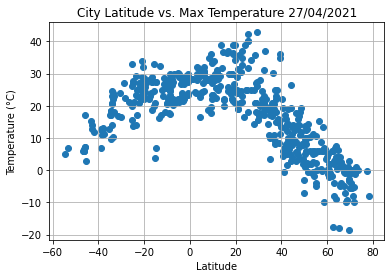

In [8]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature (°C)"], marker="o")

# Add graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%d/%m/%Y")}')
plt.ylabel("Temperature (°C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_latitude_vs_max_temperature.png")

# Show plot
plt.show()

- This plot is showing how the Maximum Temperature of a city is affected by its latitude
- The plot shows that city's with latitude closer to the equator (latitude = 0) have a higher maximum temperature than those cities away from the equator 

## Latitude vs. Humidity Plot

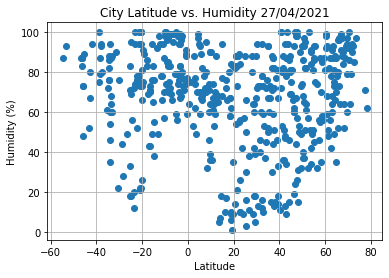

In [9]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o")

# Add graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%d/%m/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_latitude_vs_humidity.png")

# Show plot
plt.show()

- This plot shows the relationship between a city's latitude and its humidity percentage  
- Based on a visual analysis of the plot, there seems to be no correlation between latitute and humidity percentage

## Latitude vs. Cloudiness Plot

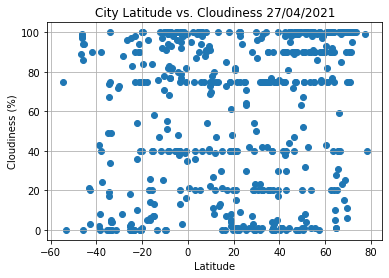

In [10]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Add graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%d/%m/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_latitude_vs_cloudiness.png")

# Show plot
plt.show()

- This plot shows the relationship between a city's latitude and its cloudiness percentage  
- Based on a visual analysis of the plot, there seems to be no correlation between latitute and cloudiness percentage

## Latitude vs. Wind Speed Plot

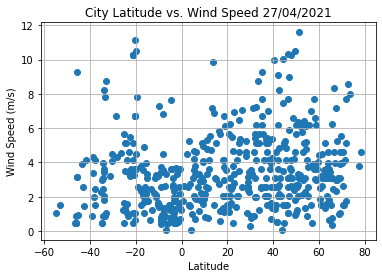

In [22]:
# Build scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (m/s)"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%d/%m/%Y")}')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/city_latitude_vs_wind_speed.png")

# Show plot
plt.show()

- This plot shows the relationship between a city's latitude and its wind speed (m/s)  
- Based on a visual analysis of the plot, there seems to be no correlation between latitute and wind speed

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8539129867465602


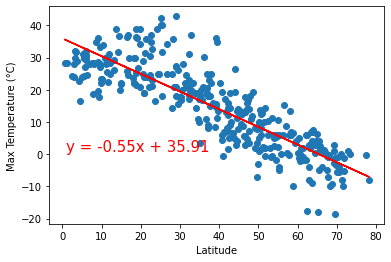

In [12]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] >= 0]
y_values = weather_data["Max Temperature (°C)"].loc[weather_data["Latitude"] >= 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

- The r-value being negative and close to -1 indicates that there is a strong negative relationship between latitude and max temperature for cities in the Northern Hemisphere
- As the latitude of the city increases, the maximum temperature decreases
- The further a city is from the equator (latitude = 0), the smaller the maximum temperature will be

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6892145632440172


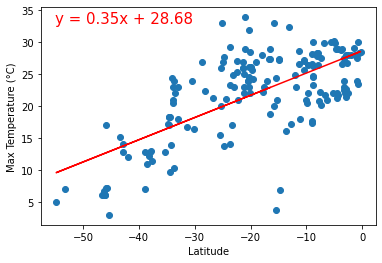

In [13]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] < 0]
y_values = weather_data["Max Temperature (°C)"].loc[weather_data["Latitude"] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,33),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.show()

- The r-value being positive and above 0.5 indicates that there is a positive relationship between latitude and maximum temperature for cities in the Southern Hemisphere
- As the latitude decreases, the max temperature will increase
- The further a city is from the equator (latitude = 0), the smaller the maximum temperature will be

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21504191442502746


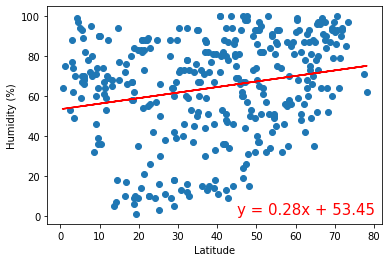

In [14]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] >= 0]
y_values = weather_data["Humidity (%)"].loc[weather_data["Latitude"] >= 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and humidity percentage for cities in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1377559123382418


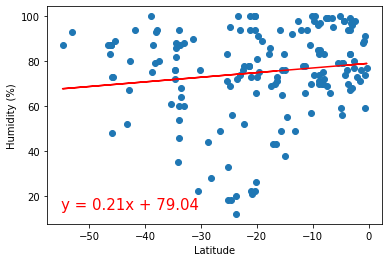

In [15]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] < 0]
y_values = weather_data["Humidity (%)"].loc[weather_data["Latitude"] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and humidity percentage for cities in the Southern Hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17038339881833836


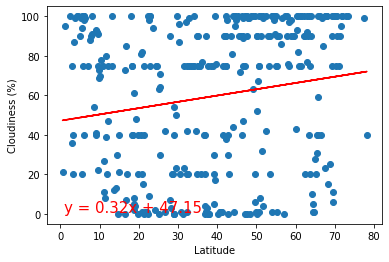

In [16]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] >= 0]
y_values = weather_data["Cloudiness (%)"].loc[weather_data["Latitude"] >= 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and cloudiness percentage for cities in the Northern Hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2151861783641627


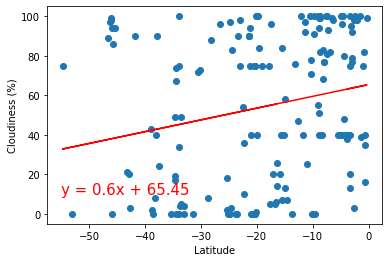

In [17]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] < 0]
y_values = weather_data["Cloudiness (%)"].loc[weather_data["Latitude"] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and cloudiness percentage for cities in the Southern Hemisphere

####  Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-value is: 0.11020065990870843


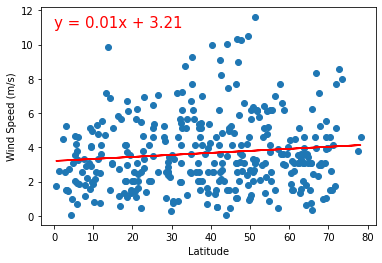

In [23]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] >= 0]
y_values = weather_data["Wind Speed (m/s)"].loc[weather_data["Latitude"] >= 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and wind speed for cities in the Northern Hemisphere

####  Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression

The r-value is: -0.1403048184526944


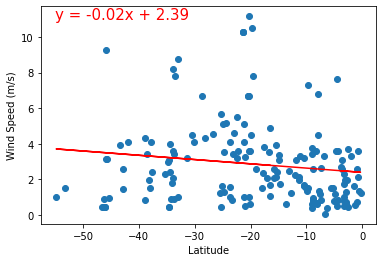

In [24]:
 # Add the linear regression equation and line to plot
x_values = weather_data["Latitude"].loc[weather_data["Latitude"] < 0]
y_values = weather_data["Wind Speed (m/s)"].loc[weather_data["Latitude"] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f'The r-value is: {rvalue}')
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

- The low r-value indicates that there is no relationship between latitude and wind speed for cities in the Southern Hemisphere